In [1]:
%pip install pandas
%pip install geopandas
%pip install numpy
%pip install pyogrio
%pip install gdown

     ---------------------------------------- 11.6/11.6 MB 9.1 MB/s eta 0:00:00
     ------------------------------------- 345.4/345.4 KB 10.5 MB/s eta 0:00:00
     ------------------------------------- 505.5/505.5 KB 10.5 MB/s eta 0:00:00
     --------------------------------------- 16.6/16.6 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Michael\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 323.6/323.6 KB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 KB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Michael\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Michael\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Michael\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 147.9/147.9 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 KB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 KB 4.5 MB/s eta 0:00:00
     -------------------------------------- 100.3/100.3 KB 6.0 MB/s eta 0:00:00
     -------------------------------------- 121.4/121.4 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 66.8/66.8 KB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Michael\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Loading Data

In [76]:
import gdown
import os.path

if not os.path.exists("Geospatial Election Data"):
    gdown.download_folder(id="1GGn98K002bbEBxbmHWE1PpZ1MrS3Em6r")
    

folder = os.listdir("Geospatial Election Data")
links = []

for file in folder: 
    links.append("Geospatial Election Data/" + file)

print(links)




#what is up my fellow ninjago enjoyers

['Geospatial Election Data/age_and_sex_data_by_county.csv', 'Geospatial Election Data/county_borders.geojson', 'Geospatial Election Data/federalelections2020.xlsx', 'Geospatial Election Data/race_data_by_county.csv']


C:\Users\Anish J\AppData\Local\Temp\ipykernel_64648\3872131948.py:20: DtypeWarning: Columns (2,7,8,10,12,14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  age_and_sex_data_by_county = pd.read_csv(age_and_sex_data_by_county_path, usecols=use_cols)
C:\Users\Anish J\AppData\Local\Temp\ipykernel_64648\3872131948.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numeric_columns = list(x for x in age_and_sex_data_by_county if age_and_sex_data_by_county[x][0].isnumeric())


no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
no value
           STATE COUNTY        NAME_x    LSAD  CENSUSAREA  \
GEO_ID                                                      
01001    Alabama    001       Autauga  County     594.436   
01009    Alabama    009        Blount  County     644.776   
01017    Alabama  

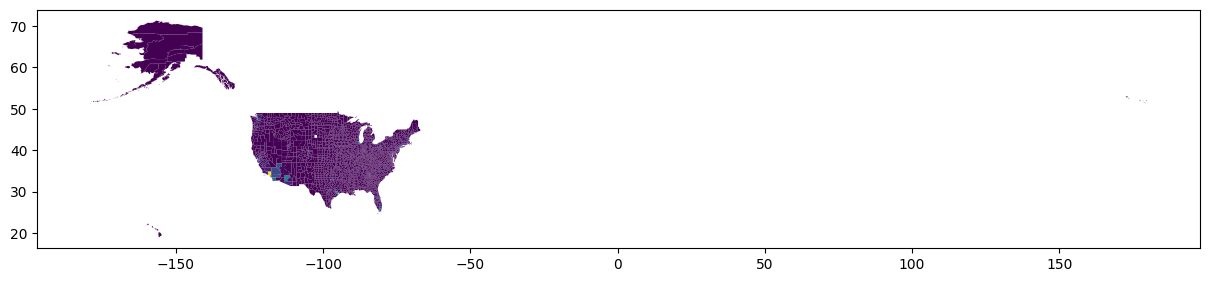

In [110]:
import pandas as pd
import geopandas as gpd
import numpy as np
import fiona
import pyogrio
from matplotlib import pyplot as plt

age_and_sex_data_by_county_path = links[0]
race_data_by_county_path = links[3]
county_borders_path = links[1]

county_geodataframe = gpd.read_file(county_borders_path)

county_geodataframe.set_index("id", inplace=True)
county_geodataframe.drop(columns=["GEO_ID"], inplace=True)
county_geodataframe.index.rename("GEO_ID", inplace=True)

use_cols = ["GEO_ID", "NAME", "DP1_0001C", "DP1_0006C", "DP1_0007C", "DP1_0009C", "DP1_0011C", "DP1_0013C", "DP1_0015C", "DP1_0017C"]

age_and_sex_data_by_county = pd.read_csv(age_and_sex_data_by_county_path, usecols=use_cols)


age_and_sex_data_by_county.set_index(['GEO_ID'], inplace=True)
age_and_sex_data_by_county.drop("Geography", inplace=True)


numeric_columns = list(x for x in age_and_sex_data_by_county if age_and_sex_data_by_county[x][0].isnumeric())
age_and_sex_data_by_county[numeric_columns] = age_and_sex_data_by_county[numeric_columns].astype(int)


age_and_sex_data_by_county.index = age_and_sex_data_by_county.index.map(lambda x : x[-5:])

race_data_by_county = pd.read_csv(race_data_by_county_path, usecols=["County", "% White", "% Black", "% Asian"])
race_data_by_county.rename(columns={"County" : "NAME_y"}, inplace=True)

age_sex_race_data_by_county = pd.concat([age_and_sex_data_by_county, race_data_by_county], axis=1)

county_geodata = county_geodataframe.merge(age_and_sex_data_by_county, on="GEO_ID", how="left")
#print(county_geodata.iloc[0])

county_geodata.plot(figsize=(15,20), column="DP1_0001C")
#
#county_geodata["NAME_y"] = county_geodata["STATE"].astype(str)
#print(county_geodata["STATE"].dtypes)

county_geodata["STATE"] = county_geodata["STATE"].astype(str)

for idx, row in county_geodata.iterrows():

    #split the name into a list where the list looks like [county, state]
    
    split_data = str(row["NAME_y"]).split(",")
    #row["LSAD"] = "asdfasdf"
    try: 
        county_geodata.at[idx, "STATE"] = split_data[1].strip()
    except:
        print("no value")

print(county_geodata)
county_geodata.to_file("county_geojson.geojson")


#print(county_geodata.merge(race_data_by_county, on="NAME_y"))

In [58]:
county_geodata.corr(numeric_only=True)

,CENSUSAREA,DP1_0001C,DP1_0006C,DP1_0007C,DP1_0009C,DP1_0011C,DP1_0013C,DP1_0015C,DP1_0017C
CENSUSAREA,1.000000,0.028700,0.029079,0.027199,0.027568,0.026610,0.025622,0.028719,0.028734
DP1_0001C,0.028700,1.000000,0.992132,0.989774,0.996888,0.997702,0.996213,0.991579,0.978069
DP1_0006C,0.029079,0.992132,1.000000,0.991501,0.990518,0.986915,0.982629,0.976616,0.959062
DP1_0007C,0.027199,0.989774,0.991501,1.000000,0.994467,0.985510,0.978355,0.971997,0.952478
DP1_0009C,0.027568,0.996888,0.990518,0.994467,1.000000,0.996011,0.989174,0.981629,0.963638
DP1_0011C,0.026610,0.997702,0.986915,0.985510,0.996011,1.000000,0.995421,0.986681,0.972720
DP1_0013C,0.025622,0.996213,0.982629,0.978355,0.989174,0.995421,1.000000,0.995494,0.985386
DP1_0015C,0.028719,0.991579,0.976616,0.971997,0.981629,0.986681,0.995494,1.000000,0.994085
DP1_0017C,0.028734,0.978069,0.959062,0.952478,0.963638,0.972720,0.985386,0.994085,1.000000
